# Exercise 1: Linear Regression

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Warm up exercise

### Return the 5*5 identity matrix

In [72]:
A = np.eye(5, 5)

In [73]:
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Plotting Data

In [129]:
data = pd.read_csv("ex1data1.txt", header=None, names=["Population","Profit"])

In [130]:
data

Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
20      6.1891   3.13860
21     20.2700  21.76700
22      5.4901   4.26300
23      6.3261   5.18750
24      5.5649   3.08250
25     18.9450  22.63800
26     12.8280  13.50100
27     10.9570   7.04670
28     13.1760  14.69200
29     22.2030  24.14700
..         ...       ...
67     10.2360   7.77540
68      5.4994   1.01730
69     20.3410  20.99200
70     10.1360   6.67990
71      7.3345   4.02590
72      6.0062   1.27840
73      7.2259   3.34110
74      5.0269  -2.68070
75      6.5479   0.29678
76      7.5386   3.88450
77      5.0365   5.70140
78     10.2740   6.75260
79      5.1077   2.05760
80      5.7292   0.47953
81      5.1884   0.20421
82      6.3557   0.67861
83      9.7687   7.54350
84      6.5159   5.34360
85      8.5172   4.24150
86      9.1802   6.79810
87      6.0020   0.92695
88      5.5204   0.15200
89      5.0594   2.82140
90      5.7077   1.84510
91      7.6366   4.29590
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]

In [330]:
data.plot(kind="scatter", x="Population", y="Profit", marker='x')
plt.show()

## Gradient descent

In [332]:
# Put ones array
data = pd.concat([pd.DataFrame(np.ones((len(data),1))), data], axis=1)

data = data.rename(columns={0:"x0"})

X = data[["x0","Population"]]
y = data["Profit"]
theta_init = np.zeros(2)

iterations = 1500
alpha = 0.01

### Cost Function

In [224]:
def computeCost(X, y, theta):
    m = len(y)
    J = sum((X.as_matrix().dot(theta) - y.as_matrix())**2) / (2*m)
    return J

In [139]:
computeCost(X, y, theta)

32.072733877455654

### Gradient Descent Function

In [151]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []
    for i in range(iterations):
        theta = theta - alpha * (1/m) * (X.as_matrix().dot(theta) - y.as_matrix()).dot(X.as_matrix())
        J_history.append(computeCost(X, y, theta))
    return [theta, J_history]

In [152]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [331]:
theta

array([-3.58741911,  1.16205536])

In [329]:
data.plot(kind="scatter", x="Population", y="Profit", marker = 'x')
plt.plot(X["Population"], X.as_matrix().dot(theta), color = "r")
plt.show()

### Vizualizing J ( theta0, theta1 )

In [264]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i][j] = computeCost(X, y, np.array([theta0_vals[i][j], theta1_vals[i][j]]))


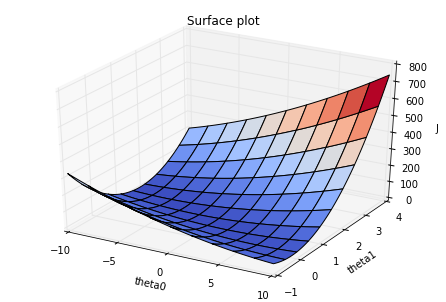

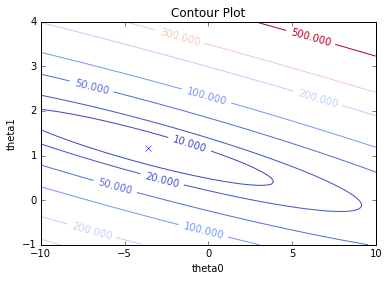

In [311]:
# Surface plot
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J")
ax.set_title("Surface plot")
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm,)
plt.show()

# Contour plot
CS = plt.contour(theta0_vals, theta1_vals, J_vals, levels=[10, 20, 50, 100, 200, 300, 500], cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta[0], theta[1], 'x')
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.title('Contour Plot')
plt.show()